In [ ]:
pip install keras-video-generators

In [ ]:
import os
import glob
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras_video import VideoFrameGenerator
from google.colab import drive

In [ ]:
# use_tpu = True #@param {type:"boolean"}

# if use_tpu:
#     assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

# if 'COLAB_TPU_ADDR' in os.environ:
#   TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
# else:
#   TF_MASTER=''

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/Shareddrives/

/content/gdrive/Shareddrives


In [ ]:

# %cp -av final2040/HMDB_more/fencing final2040/HMDB/fencing
# %cp -av final2040/HMDB_more/flic_flac final2040/HMDB/flic_flac
# %cp -av final2040/HMDB_more/golf final2040/HMDB/glof
# %cp -av final2040/HMDB_more/handstand final2040/HMDB/handstand
# %cp -av final2040/HMDB_more/hit final2040/HMDB/hit

'final2040/HMDB_more/fencing' -> 'final2040/HMDB/fencing'
'final2040/HMDB_more/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_0.avi' -> 'final2040/HMDB/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_0.avi'
'final2040/HMDB_more/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_0.avi.tform.mat' -> 'final2040/HMDB/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_0.avi.tform.mat'
'final2040/HMDB_more/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_1.avi.tform.mat' -> 'final2040/HMDB/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_1.avi.tform.mat'
'final2040/HMDB_more/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_1.avi' -> 'final2040/HMDB/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_1.avi'
'final2040/HMDB_more/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fenci

In [ ]:
# %cp -av final2040/HMDB_more/hug final2040/HMDB/hug
# %cp -av final2040/HMDB_more/jump final2040/HMDB/jump
# %cp -av final2040/HMDB_more/kick final2040/HMDB/kick
# %cp -av final2040/HMDB_more/kiss final2040/HMDB/kiss

'final2040/HMDB_more/hug' -> 'final2040/HMDB/hug'
'final2040/HMDB_more/hug/Crazy_Fan!_Michael_Jackson_in_M_nchen_hug_f_cm_np2_ba_bad_2.avi' -> 'final2040/HMDB/hug/Crazy_Fan!_Michael_Jackson_in_M_nchen_hug_f_cm_np2_ba_bad_2.avi'
'final2040/HMDB_more/hug/Crazy_Fan!_Michael_Jackson_in_M_nchen_hug_f_cm_np2_ba_bad_2.avi.tform.mat' -> 'final2040/HMDB/hug/Crazy_Fan!_Michael_Jackson_in_M_nchen_hug_f_cm_np2_ba_bad_2.avi.tform.mat'
'final2040/HMDB_more/hug/Calins_gratuits_a_Paris_-_Free_Hugs_France_-_version_longue_hug_u_cm_np2_ba_med_22.avi.tform.mat' -> 'final2040/HMDB/hug/Calins_gratuits_a_Paris_-_Free_Hugs_France_-_version_longue_hug_u_cm_np2_ba_med_22.avi.tform.mat'
'final2040/HMDB_more/hug/Calins_gratuits_a_Paris_-_Free_Hugs_France_-_version_longue_hug_u_cm_np2_ba_med_22.avi' -> 'final2040/HMDB/hug/Calins_gratuits_a_Paris_-_Free_Hugs_France_-_version_longue_hug_u_cm_np2_ba_med_22.avi'
'final2040/HMDB_more/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_15.avi.tform.mat' -> 'final2040/H

In [ ]:
for i in glob.glob('final2040/HMDB/*'):
  print(i.split(os.path.sep)[2])

brush_hair
smile
sit
smoke
cartwheel
catch
chew
clap
climb
climb_stairs
dive
drink
dribble
draw_sword
eat
fall_floor
fencing
flic_flac
glof
handstand
hit
hug
jump
kick
kiss


In [ ]:
# use sub directories names as classes
classes = [i.split(os.path.sep)[2] for i in glob.glob('final2040/HMDB/*')]
classes.sort()
print(classes)

# some global params
SIZE = 224
CHANNELS = 3
NBFRAME = 5
BS = 10

# pattern to get videos and classes
glob_pattern='final2040/HMDB/{classname}/*.avi'

# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)


['brush_hair', 'cartwheel', 'catch', 'chew', 'clap', 'climb', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'glof', 'handstand', 'hit', 'hug', 'jump', 'kick', 'kiss', 'sit', 'smile', 'smoke']


In [ ]:
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.33, 
    shuffle=True,
    batch_size=BS,
    target_shape= (SIZE,SIZE),
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

Warning, `split` argument is replaced by `split_val`, please condider to change your source code.The `split` argument will be removed in future releases.


class brush_hair, validation count: 35, train count: 73
class cartwheel, validation count: 35, train count: 72
class catch, validation count: 33, train count: 69
class chew, validation count: 35, train count: 74
class clap, validation count: 42, train count: 88
class climb, validation count: 35, train count: 73
class climb_stairs, validation count: 36, train count: 76
class dive, validation count: 41, train count: 86
class draw_sword, validation count: 33, train count: 70
class dribble, validation count: 47, train count: 98
class drink, validation count: 54, train count: 110
class eat, validation count: 35, train count: 73
class fall_floor, validation count: 44, train count: 92
class fencing, validation count: 38, train count: 78
class flic_flac, validation count: 35, train count: 72
class glof, validation count: 34, train count: 71
class handstand, validation count: 37, train count: 76
class hit, validation count: 41, train count: 86
class hug, validation count: 38, train count: 80
cl

In [ ]:
#get validation data
valid = train.get_validation_generator()

Total data: 25 classes for 966 files for validation


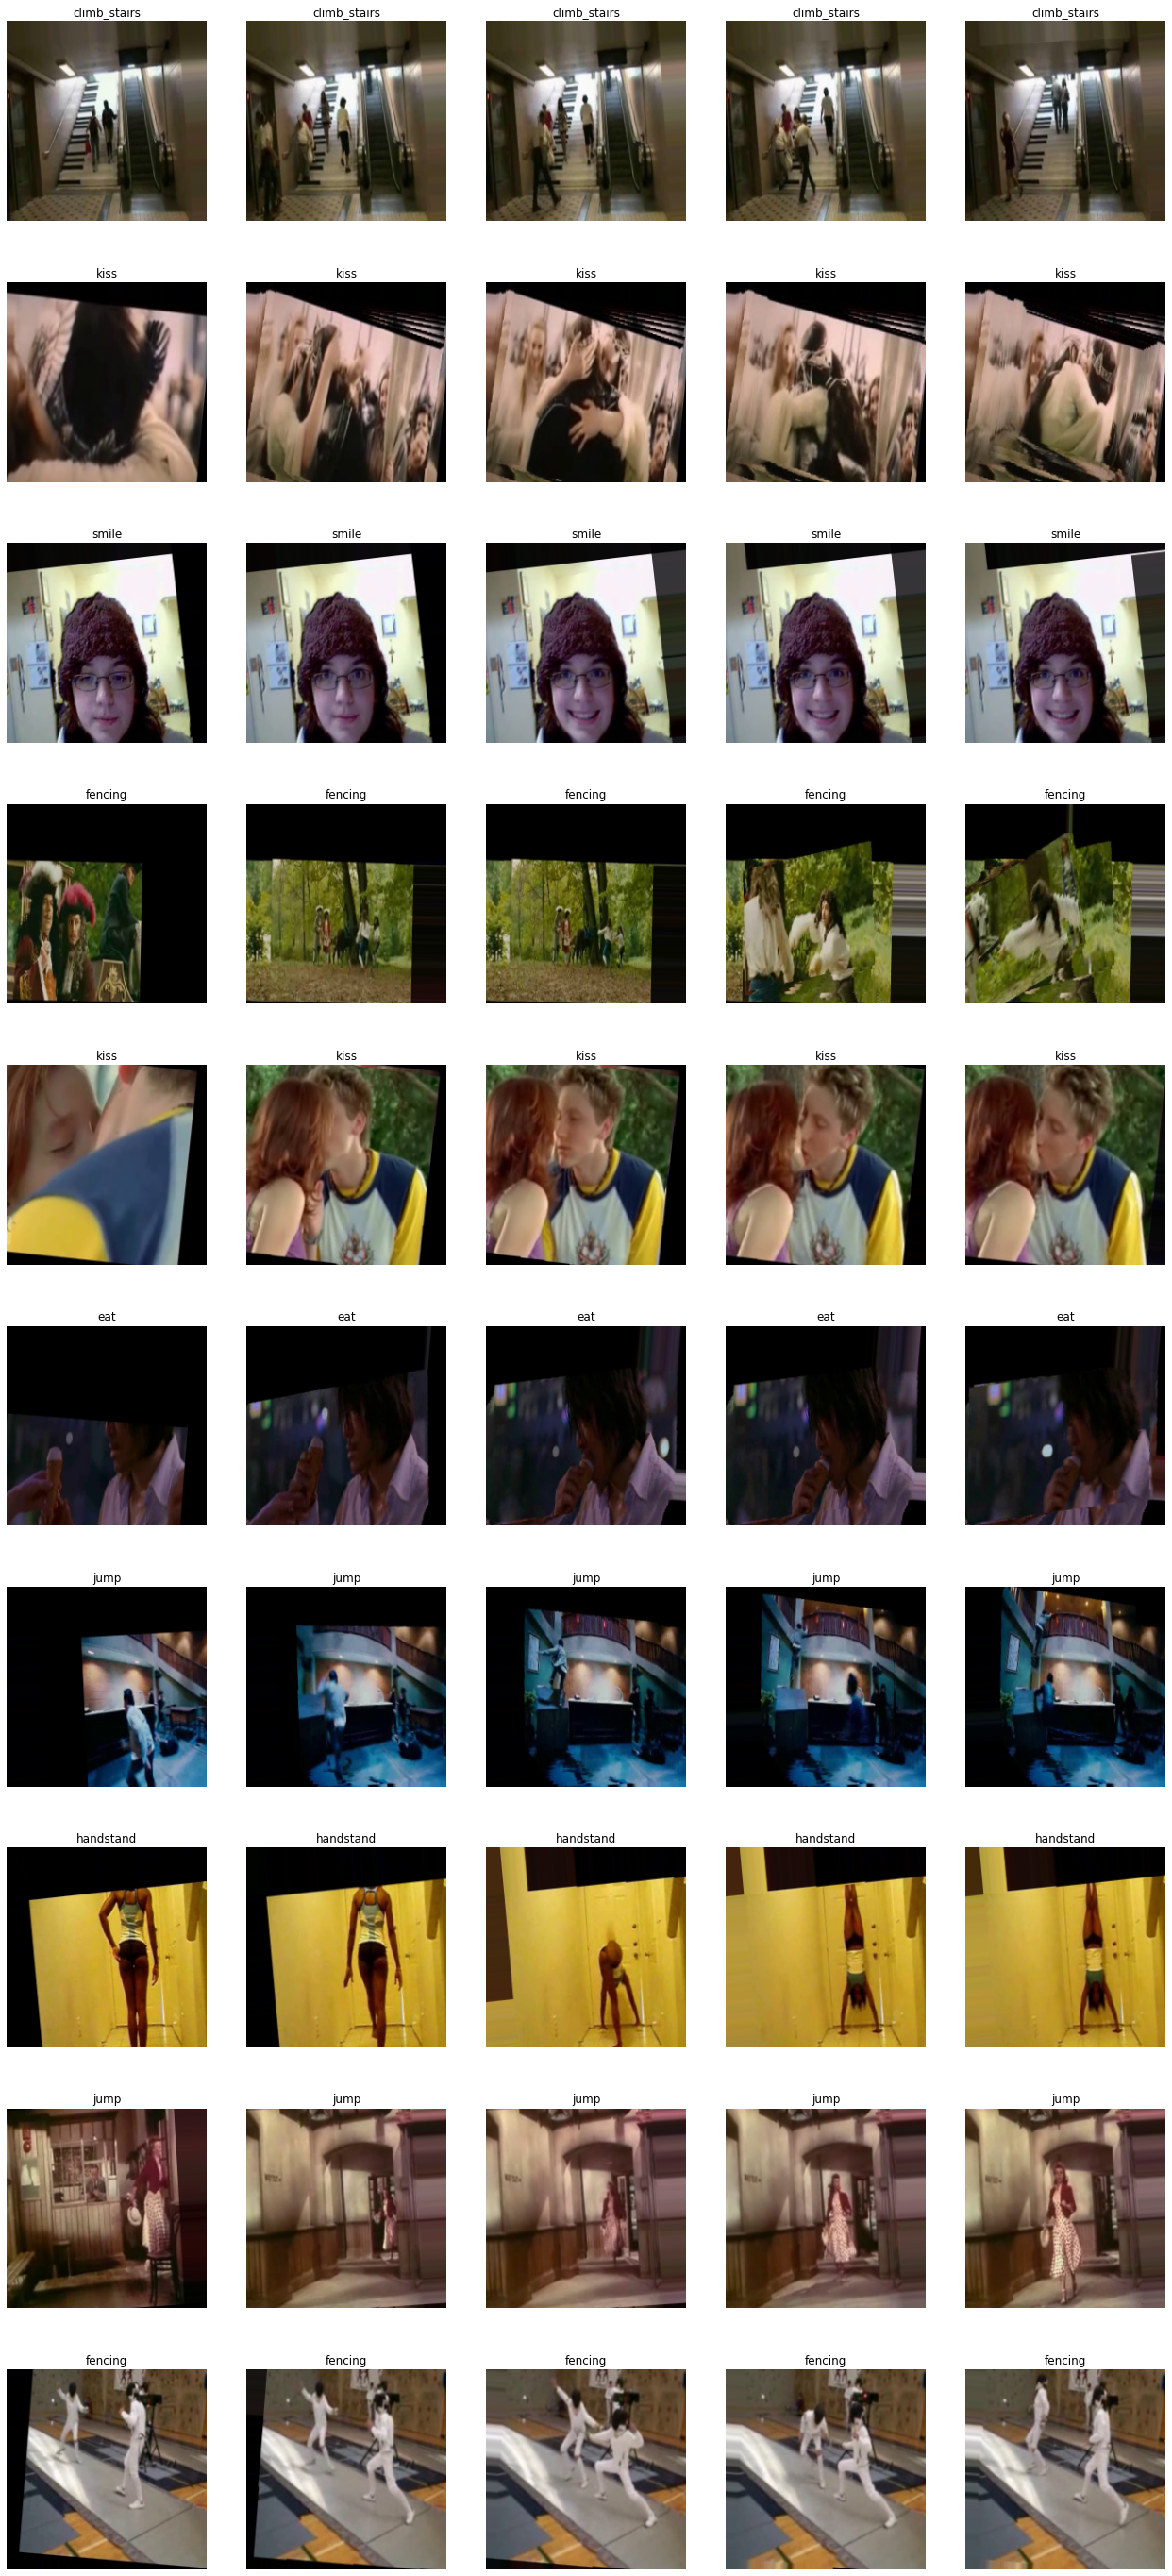

In [ ]:
import keras_video.utils
keras_video.utils.show_sample(train)

## Define NN with Mobile Net head

In [ ]:
#import keras layers
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D
from keras.layers import TimeDistributed, GRU, Dense, Dropout, Flatten, LSTM
from tensorflow.keras import regularizers


In [ ]:
def build_head(shape=(SIZE, SIZE, 3)):
    model = keras.applications.mobilenet.MobileNet(
        include_top=False,
        input_shape=shape,
        weights='imagenet')
    # Keep 9 layers to train
    trainable = 9
    for layer in model.layers[:-trainable]:
        layer.trainable = False
    for layer in model.layers[-trainable:]:
        layer.trainable = True
    output = GlobalMaxPool2D()
    return keras.Sequential([model, output])

In [ ]:
nbout = len(classes)
def action_model(shape=(5, 224, 224, 3), nbout=nbout):

    head = build_head(shape[1:])
    # then create our final model
    model = keras.Sequential()
    # add the head with (5, 112, 112, 3) shape
    model.add(TimeDistributed(head, input_shape=shape))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
    # # here, you can also use GRU or LSTM
    # model.add(LSTM(64))
    # and finally, we make a decision network
    model.add(Dense(1024, kernel_initializer='he_normal',kernel_regularizer='l2', activation='relu'))
    model.add(Dropout(.5))
    # model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
    # model.add(Dropout(.3))
    model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    return model

In [ ]:
# try: # detect TPUs
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
#   tf.config.experimental_connect_to_cluster(tpu)
#   tf.tpu.experimental.initialize_tpu_system(tpu)
#   strategy = tf.distribute.experimental.TPUStrategy(tpu)
# except ValueError: # detect GPUs
#   strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
#   #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
#   #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

# print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Initializing the TPU system: grpc://10.106.177.170:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.106.177.170:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


In [ ]:
INSHAPE=(NBFRAME,) + (SIZE, SIZE) + (CHANNELS,) # (5, 360, 360, 3)

model = action_model(INSHAPE, len(classes))
optimizer = keras.optimizers.SGD(0.001)
model.compile(
      optimizer,
      'categorical_crossentropy',
      metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_2 (TimeDist (None, 5, 1024)           3228864   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 5, 512)            2623488   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 5, 256)            656384    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [ ]:
# INSHAPE=(NBFRAME,) + (SIZE, SIZE) + (CHANNELS,) # (5, 360, 360, 3)

# with strategy.scope():
#   model = action_model(INSHAPE, len(classes))
#   optimizer = keras.optimizers.SGD(0.001)
#   model.compile(
#       optimizer,
#       'categorical_crossentropy',
#       metrics=['acc'])
# model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 5, 1024)           3228864   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 5, 512)            2623488   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 5, 256)            656384    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [ ]:
EPOCHS=300

cb1 = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.7, patience=3, verbose=1, mode='auto', min_lr=1e-15)
cb2 = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=30, restore_best_weights=True)
history = model.fit(
    train,
    validation_data=valid,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[cb1, cb2]
)

Epoch 1/300
68/68 [==============================] - 47s 568ms/step - loss: 22.6761 - acc: 0.0950 - val_loss: 22.6040 - val_acc: 0.1219
Epoch 2/300
68/68 [==============================] - 36s 535ms/step - loss: 22.5857 - acc: 0.1396 - val_loss: 22.5297 - val_acc: 0.1688
Epoch 3/300
68/68 [==============================] - 36s 534ms/step - loss: 22.5347 - acc: 0.1436 - val_loss: 22.4593 - val_acc: 0.1781
Epoch 4/300
68/68 [==============================] - 36s 536ms/step - loss: 22.4592 - acc: 0.1673 - val_loss: 22.3915 - val_acc: 0.1875
Epoch 5/300
68/68 [==============================] - 36s 531ms/step - loss: 22.3919 - acc: 0.1290 - val_loss: 22.3255 - val_acc: 0.2156
Epoch 6/300
68/68 [==============================] - 36s 534ms/step - loss: 22.3263 - acc: 0.1394 - val_loss: 22.2519 - val_acc: 0.2531
Epoch 7/300
68/68 [==============================] - 36s 530ms/step - loss: 22.2637 - acc: 0.1521 - val_loss: 22.1767 - val_acc: 0.3031
Epoch 8/300
68/68 [=============================

## Load model and change last layer

In [ ]:
from tensorflow.keras.models import load_model
INSHAPE=(NBFRAME,) + (SIZE, SIZE) + (CHANNELS,)
nbout = len(classes)
print(nbout)
model = load_model("final2040/saved_model/25classes_0418_0.8573.h5")
model.summary()

25
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_13_input (I [(None, 5, 224, 224, 3)]  0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 5, 1024)           3228864   
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 5, 512)            2623488   
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 5, 256)            656384    
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              132096    
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0

In [ ]:
last_layer = model.get_layer('dense_38')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
x = tf.keras.layers.Dense(nbout, activation='softmax')(last_output)
model2 = tf.keras.Model(model.input, x) 
optimizer = keras.optimizers.SGD(0.001)
model2.compile(
      optimizer,
      'categorical_crossentropy',
      metrics=['acc'])
model2.summary()

last layer output shape:  (None, 64)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_13_input (I [(None, 5, 224, 224, 3)]  0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 5, 1024)           3228864   
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 5, 512)            2623488   
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 5, 256)            656384    
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              132096    
_________________________________________________________________
dropout_18 (Dropout)  

In [ ]:
model2.evaluate(valid)

96/96 [==============================] - 6s 57ms/step - loss: 10.4377 - acc: 0.8583


[10.437726020812988, 0.8583333492279053]

In [ ]:
model.compile(
      keras.optimizers.SGD(1e-5),
      'categorical_crossentropy',
      metrics=['acc'])

In [ ]:
EPOCHS=300

cb1 = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='auto', min_lr=1e-15)
cb2 = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, restore_best_weights=True)
history = model2.fit(
    train,
    validation_data=valid,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[cb1, cb2]
)

Epoch 1/300
201/201 [==============================] - 422s 2s/step - loss: 10.5079 - acc: 0.8235 - val_loss: 10.2901 - val_acc: 0.9021
Epoch 2/300
201/201 [==============================] - 130s 644ms/step - loss: 10.5164 - acc: 0.8393 - val_loss: 10.2862 - val_acc: 0.9031
Epoch 3/300
201/201 [==============================] - 128s 637ms/step - loss: 10.5067 - acc: 0.8311 - val_loss: 10.2839 - val_acc: 0.9031
Epoch 4/300
201/201 [==============================] - 128s 634ms/step - loss: 10.5188 - acc: 0.8114 - val_loss: 10.2800 - val_acc: 0.9083
Epoch 5/300
201/201 [==============================] - 129s 641ms/step - loss: 10.5459 - acc: 0.8041 - val_loss: 10.2867 - val_acc: 0.9021
Epoch 6/300
201/201 [==============================] - 128s 638ms/step - loss: 10.5275 - acc: 0.8153 - val_loss: 10.2791 - val_acc: 0.9094
Epoch 7/300
201/201 [==============================] - 128s 638ms/step - loss: 10.5431 - acc: 0.8129 - val_loss: 10.2808 - val_acc: 0.9042
Epoch 8/300
201/201 [=========

In [ ]:
# save model
import os
def save_model(model, name):
  model_name = '{}.h5'.format(name)
  save_dir = os.path.join(os.getcwd(), 'final2040/saved_model')
  
  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

save_model(model2, '25classes_0418_0.9')

Saved trained model at /content/gdrive/Shareddrives/final2040/saved_model/25classes_0418_0.9.h5 


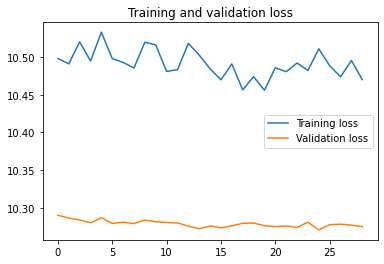

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
#plt.figure()
plt.savefig('final2040/output_figures/25classes_tune_loss.png')

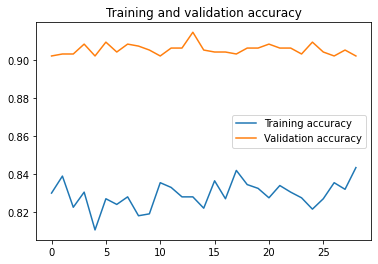

In [ ]:
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
#plt.figure()
plt.savefig('final2040/output_figures/25classes_tune_acc.png')

#### Reduce the regularization

In [ ]:
nbout = len(classes)
def action_model(shape=(5, SIZE, SIZE, 3), nbout=nbout):
    # Create our head with (112, 112, 3) input shape
    head = build_mobilenet(shape[1:])
    # then create our final model
    model = keras.Sequential()
    # add the head with (5, 112, 112, 3) shape
    model.add(TimeDistributed(head, input_shape=shape))
    # here, you can also use GRU or LSTM
    model.add(LSTM(64))
    # and finally, we make a decision network
    model.add(Dense(1024, kernel_initializer='he_normal',kernel_regularizer=regularizers.l1_l2(l1=1e-5), activation='relu'))
    model.add(Dropout(.5))
    # model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
    # model.add(Dropout(.5))
    # model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
    # # model.add(Dropout(.5))
    # model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    return model


INSHAPE=(NBFRAME,SIZE,SIZE, CHANNELS) # (5, 224, 224, 3)
model_1 = action_model(INSHAPE, len(classes))
optimizer = keras.optimizers.SGD(0.001)
model_1.compile(
    optimizer,
    'categorical_crossentropy',
    metrics=['acc']
)

EPOCHS=100
# create a "chkp" directory before to run that
# because ModelCheckpoint will write models inside
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.7, patience=3, verbose=1, mode='auto', min_lr=1e-15),
    
    keras.callbacks.ModelCheckpoint(
        'chkp/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
        verbose=1),
        tensorboard_callback('mobilenet_1')
]
h_mobile_1 = model_1.fit_generator(
    train,
    validation_data=valid,
    verbose=1,
    epochs=EPOCHS,
#    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
31/31 [==============================] - 22s 601ms/step - loss: 22.5851 - acc: 0.2209 - val_loss: 21.7678 - val_acc: 0.3571
Epoch 2/100
31/31 [==============================] - 18s 565ms/step - loss: 22.0463 - acc: 0.2940 - val_loss: 21.7526 - val_acc: 0.2786
Epoch 3/100
31/31 [==============================] - 17s 558ms/step - loss: 21.9456 - acc: 0.2514 - val_loss: 21.7395 - val_acc: 0.2143
Epoch 4/100
31/31 [==============================] - 17s 558ms/step - loss: 21.8300 - acc: 0.2328 - val_loss: 21.7065 - val_acc: 0.2357
Epoch 5/100
31/31 [==============================] - 17s 557ms/step - loss: 21.7408 - acc: 0.2784 - val_loss: 21.6736 - val_acc: 0.2786
Epoch 6/100
31/31 [==============================] - 17s 556ms/step - loss: 21.6814 - acc: 0.2830 - val_loss: 21.6448 - val_acc: 0.3214
Epoch 7/100
31/31 [==============================] - 17s 549ms/step - loss: 21.6571 - acc: 0.2757 - val_loss: 21.6194 - val_acc: 0.3286
Epoch 8/100
31/31 [=============================

In [ ]:
# save model
import os
def save_model(model, name):
  model_name = '{}.h5'.format(name)
  save_dir = os.path.join(os.getcwd(), 'final2040/saved_model')
  
  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

save_model(model, '16classes_0417_0.8687')

Saved trained model at /content/gdrive/Shareddrives/final2040/saved_model/MobileNet_lr0.001.h5 


###mobileNet with bidirectional layers


In [ ]:

nbout = len(classes)
def action_model(shape=(5, SIZE, SIZE, 3), nbout=nbout):
    # Create our head with (112, 112, 3) input shape
    head = build_mobilenet(shape[1:])
    # then create our final model
    model = keras.Sequential()
    # add the head with (5, 112, 112, 3) shape
    model.add(TimeDistributed(head, input_shape=shape))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
    # here, you can also use GRU or LSTM
    #model.add(LSTM(64))
    # and finally, we make a decision network
    model.add(Dense(1024, kernel_initializer='he_normal', activation='relu'))
    model.add(Dropout(.5))
    #model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
    #model.add(Dropout(.5))
    #model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
    #model.add(Dropout(.5))
    model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    return model
